In [1]:
# Step 2: Import libraries and load data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load data
df = pd.read_csv('bank-full.csv', sep=';')

# Preview
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
# Check for null values
print(df.isnull().sum())

# Convert categorical columns to numeric
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

df.head()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [3]:
# Features and target
X = df.drop('y', axis=1)
y = df['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Create model
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [5]:
# Predictions
y_pred = model.predict(X_test)


In [6]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {acc * 100:.2f}%")

# Classification Report (in %)
report = classification_report(y_test, y_pred, output_dict=True)

print("\n📊 Classification Report (in %):")
for label, metrics in report.items():
    if isinstance(metrics, dict):
        print(f"\nClass {label}:")
        for metric_name, value in metrics.items():
            if metric_name != 'support':
                print(f"{metric_name}: {value * 100:.2f}%")
            else:
                print(f"{metric_name}: {value}")
    else:
        print(f"\n{label}: {metrics * 100:.2f}%")



✅ Accuracy: 88.49%

📊 Classification Report (in %):

Class 0:
precision: 90.24%
recall: 97.45%
f1-score: 93.71%
support: 7952.0

Class 1:
precision: 55.48%
recall: 23.19%
f1-score: 32.71%
support: 1091.0

accuracy: 88.49%

Class macro avg:
precision: 72.86%
recall: 60.32%
f1-score: 63.21%
support: 9043.0

Class weighted avg:
precision: 86.05%
recall: 88.49%
f1-score: 86.35%
support: 9043.0


In [7]:
cm = confusion_matrix(y_test, y_pred)
print("\n🧮 Confusion Matrix:")
print(cm)



🧮 Confusion Matrix:
[[7749  203]
 [ 838  253]]


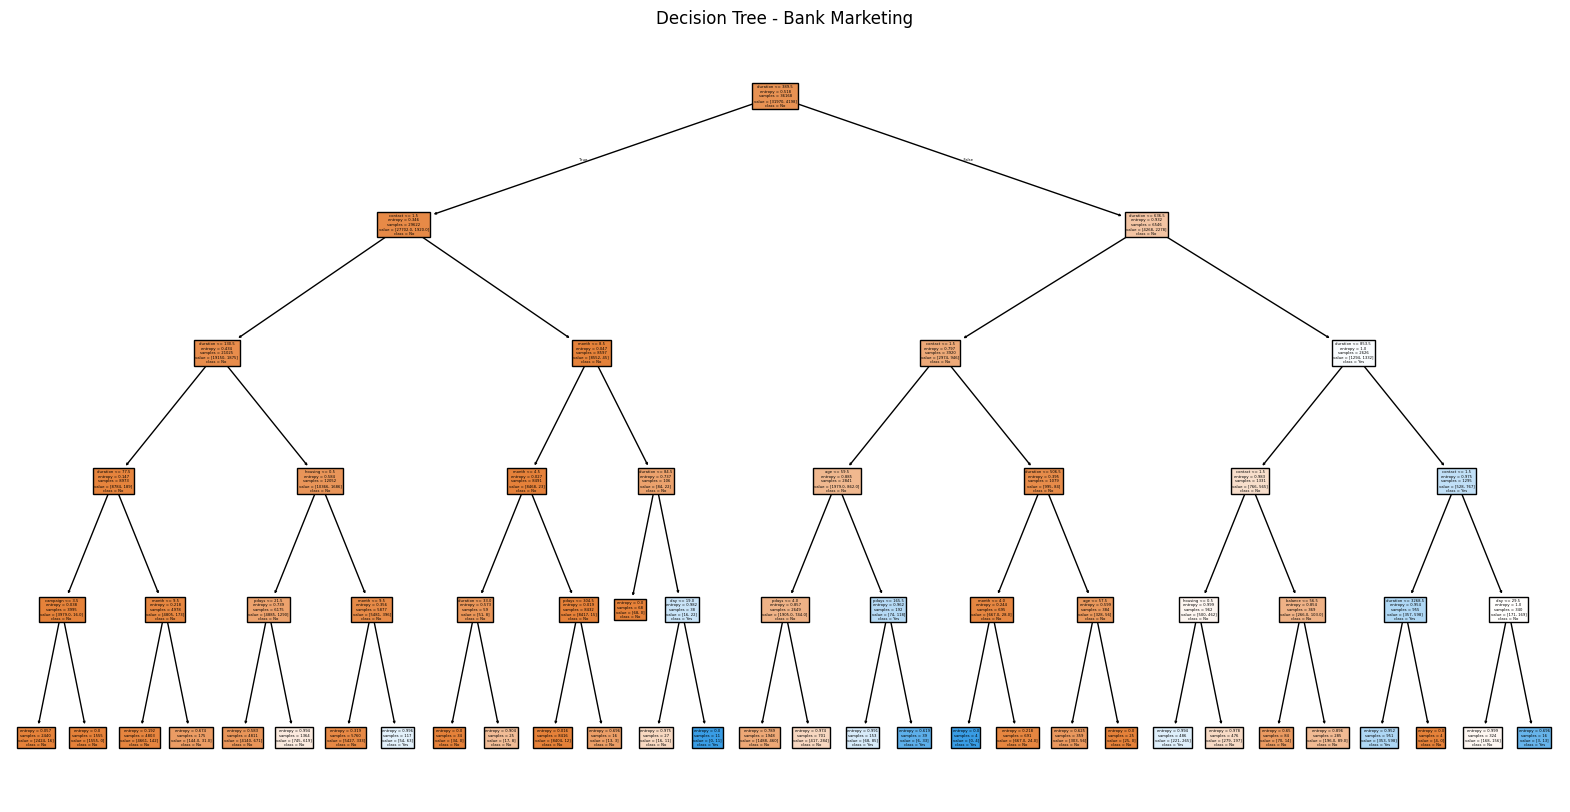

In [8]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree - Bank Marketing")
plt.show()
